# Basic Data Analysis of Filtered Log2 Dataset

This notebook performs basic data analysis on the filtered log2 transformed dataset.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
%matplotlib inline

## Data Loading and Basic Information

In [2]:
# Load the dataset
df = pd.read_csv('raw_data/filtered_已经log2.csv')

# Rename clinical columns to English
column_mapping = {
    '临床妊娠结局': 'Y1',  # Clinical pregnancy outcome
    '活产结局': 'Y2',      # Live birth outcome  
    '体重指数': 'BMI',      # Body mass index
    '基础内分泌FSH': 'FSH', # Basal FSH
    '基础内分泌AMH': 'AMH', # Basal AMH
    '移植胚胎数': 'Embryo_Count'  # Number of transferred embryos
}

df = df.rename(columns=column_mapping)

print(f"Dataset shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print(f"Updated column names: {list(column_mapping.values())}")

Dataset shape: (377, 40592)
Number of samples: 377
Number of features: 40592
Updated column names: ['Y1', 'Y2', 'BMI', 'FSH', 'AMH', 'Embryo_Count']


In [3]:
# Display basic information about the dataset
print("Data types:")
print(df.dtypes.value_counts())
print("\nFirst few columns:")
print(df.columns[:10].tolist())

Data types:
float64    36241
int64       4351
Name: count, dtype: int64

First few columns:
['Y1', 'Y2', 'BMI', 'FSH', 'AMH', 'Embryo_Count', 'TSPAN6', 'TNMD', 'DPM1', 'SCYL3']


In [4]:
# Check for missing values
missing_values = df.isnull().sum()

missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(f"Total columns with missing values: {len(missing_summary)}")
if len(missing_summary) > 0:
    print("\nTop 10 columns with most missing values:")
    print(missing_summary.head(10))
else:
    print("No missing values found in the dataset!")

Total columns with missing values: 3

Top 10 columns with most missing values:
     Missing Count  Missing Percentage
FSH             27            7.161804
AMH              6            1.591512
BMI              2            0.530504


## Clinical Variables Analysis

In [5]:
# Identify clinical outcome columns (now with English names)
clinical_cols = ['Y1', 'Y2', 'BMI', 'FSH', 'AMH', 'Embryo_Count']

# Check if these columns exist in the dataset
available_clinical_cols = [col for col in clinical_cols if col in df.columns]
print(f"Available clinical columns: {available_clinical_cols}")

if available_clinical_cols:
    print("\nClinical variables summary:")
    for col in available_clinical_cols:
        print(f"\n{col}:")
        if df[col].dtype == 'object' or df[col].nunique() < 10:
            print(df[col].value_counts())
        else:
            print(df[col].describe())

Available clinical columns: ['Y1', 'Y2', 'BMI', 'FSH', 'AMH', 'Embryo_Count']

Clinical variables summary:

Y1:
Y1
0    227
1    150
Name: count, dtype: int64

Y2:
Y2
0    259
1    118
Name: count, dtype: int64

BMI:
count    375.000000
mean      21.566373
std        2.656876
min       15.000000
25%       19.800000
50%       21.200000
75%       23.200000
max       29.900000
Name: BMI, dtype: float64

FSH:
count    350.000000
mean       6.879343
std        2.078577
min        1.160000
25%        5.620000
50%        6.630000
75%        7.837500
max       23.030000
Name: FSH, dtype: float64

AMH:
count    371.000000
mean       4.166226
std        3.042800
min        0.180000
25%        2.170000
50%        3.290000
75%        5.285000
max       22.570000
Name: AMH, dtype: float64

Embryo_Count:
Embryo_Count
2    257
1    120
Name: count, dtype: int64


## Gene Expression Data Overview

In [6]:
# Identify gene expression columns (assuming they start after clinical variables)
# Gene columns are likely the ones with gene names
gene_cols = [col for col in df.columns if col not in available_clinical_cols]
print(f"Number of gene expression features: {len(gene_cols)}")
print(f"First 10 gene features: {gene_cols[:10]}")

# Select numeric gene expression data
gene_data = df[gene_cols].select_dtypes(include=[np.number])
print(f"Numeric gene expression features: {gene_data.shape[1]}")

Number of gene expression features: 40586
First 10 gene features: ['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'FIRRM', 'FGR', 'CFH', 'FUCA2', 'GCLC', 'NFYA']
Numeric gene expression features: 40586


In [7]:
# Basic statistics for gene expression data (sample of first 10 genes)
print("Gene expression data summary (first 10 genes):")
print(gene_data.iloc[:, :10].describe())

print(f"\nOverall statistics for all {gene_data.shape[1]} genes:")
print(f"Mean expression range: {gene_data.mean().min():.3f} to {gene_data.mean().max():.3f}")
print(f"Standard deviation range: {gene_data.std().min():.3f} to {gene_data.std().max():.3f}")

Gene expression data summary (first 10 genes):
           TSPAN6        TNMD        DPM1       SCYL3       FIRRM         FGR  \
count  377.000000  377.000000  377.000000  377.000000  377.000000  377.000000   
mean     5.135778    0.124902    4.455772    3.216072    1.886154    2.460167   
std      0.450512    0.334831    0.363633    0.390597    0.465366    0.844026   
min      3.446831    0.000000    2.864161    1.118932    0.000000    0.265078   
25%      4.874177    0.000000    4.258238    2.983126    1.615106    1.888068   
50%      5.161691    0.000000    4.491822    3.247790    1.883402    2.523749   
75%      5.426692    0.000000    4.685155    3.469945    2.201978    3.002220   
max      6.171923    1.823409    5.426232    4.257946    3.177509    5.892608   

              CFH       FUCA2        GCLC        NFYA  
count  377.000000  377.000000  377.000000  377.000000  
mean     0.245220    6.552386    3.262900    3.475003  
std      0.256885    0.489345    0.384719    0.396150  

## Data Distribution Analysis

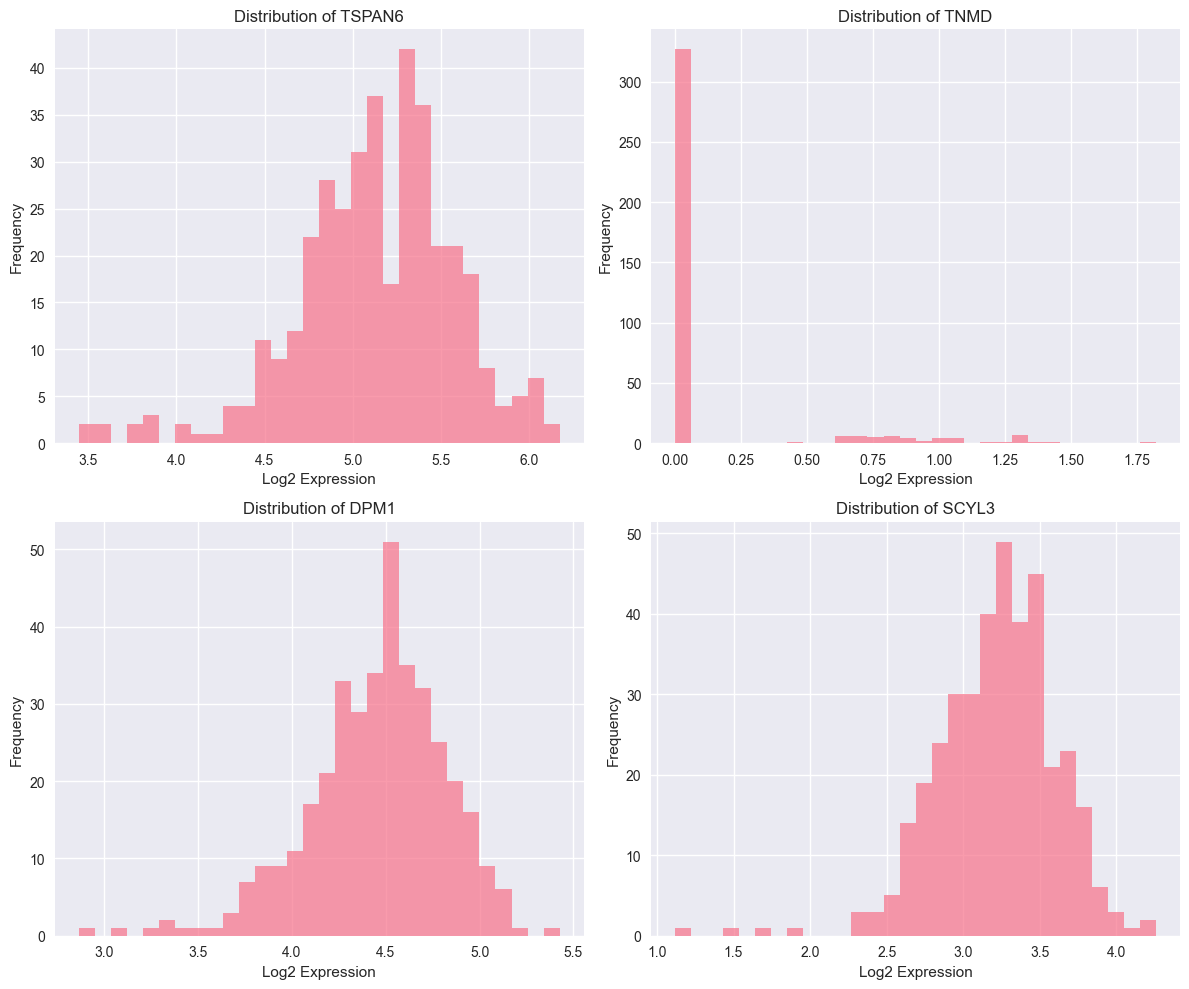

In [8]:
# Plot distribution of a sample of gene expression values
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Select first 4 numeric gene columns for demonstration
sample_genes = gene_data.columns[:4]

for i, gene in enumerate(sample_genes):
    row = i // 2
    col = i % 2
    axes[row, col].hist(gene_data[gene].dropna(), bins=30, alpha=0.7)
    axes[row, col].set_title(f'Distribution of {gene}')
    axes[row, col].set_xlabel('Log2 Expression')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
# Overall distribution statistics
print("Overall gene expression statistics:")
all_gene_values = gene_data.values.flatten()
all_gene_values = all_gene_values[~np.isnan(all_gene_values)]

print(f"Mean expression: {np.mean(all_gene_values):.3f}")
print(f"Median expression: {np.median(all_gene_values):.3f}")
print(f"Standard deviation: {np.std(all_gene_values):.3f}")
print(f"Min expression: {np.min(all_gene_values):.3f}")
print(f"Max expression: {np.max(all_gene_values):.3f}")

Overall gene expression statistics:
Mean expression: 1.404
Median expression: 0.000
Standard deviation: 2.099
Min expression: 0.000
Max expression: 18.343


## Correlation Analysis

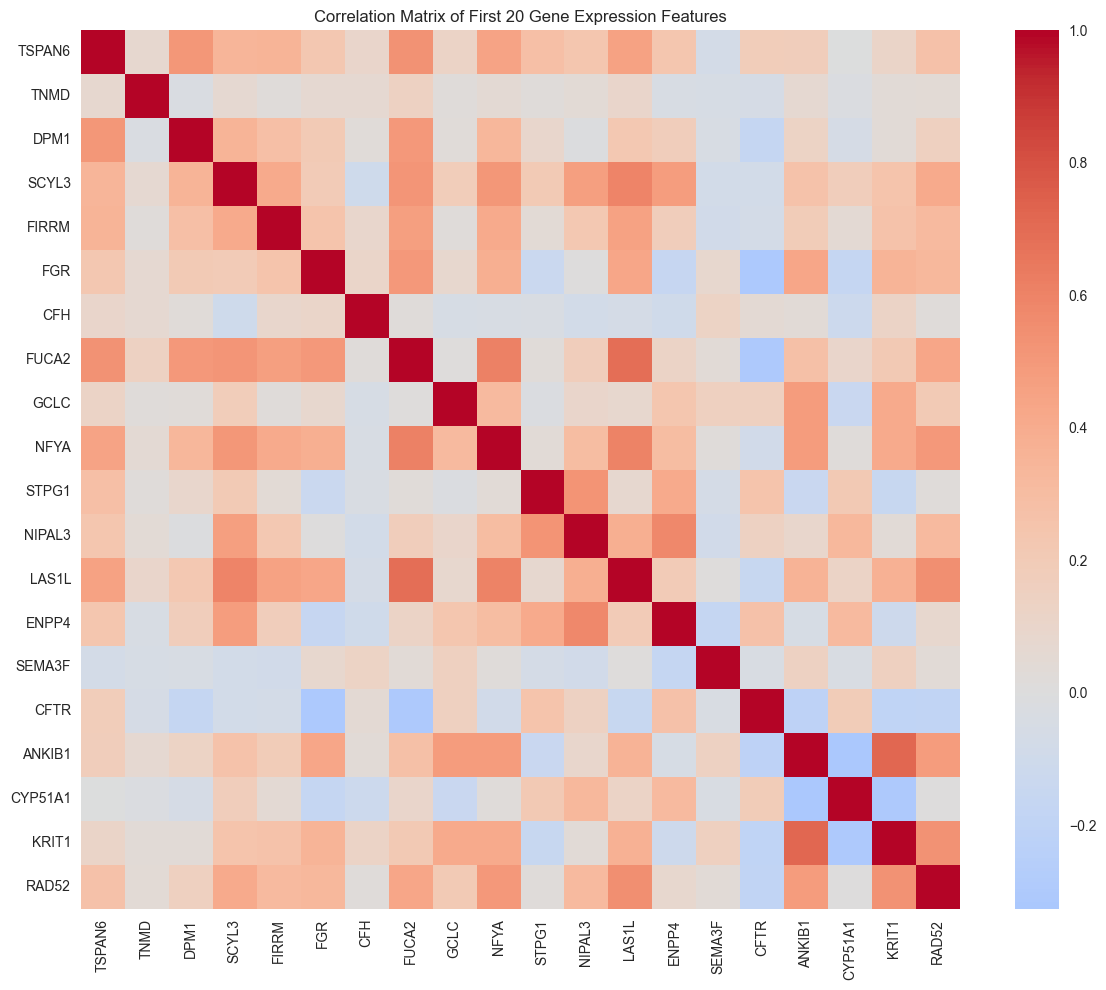

In [10]:
# Correlation matrix for a subset of genes (first 20 for visualization)
subset_genes = gene_data.iloc[:, :20]
correlation_matrix = subset_genes.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of First 20 Gene Expression Features')
plt.tight_layout()
plt.show()

## Clinical Outcomes Analysis

Y1 (Clinical pregnancy outcome) distribution:
Y1
0    227
1    150
Name: count, dtype: int64


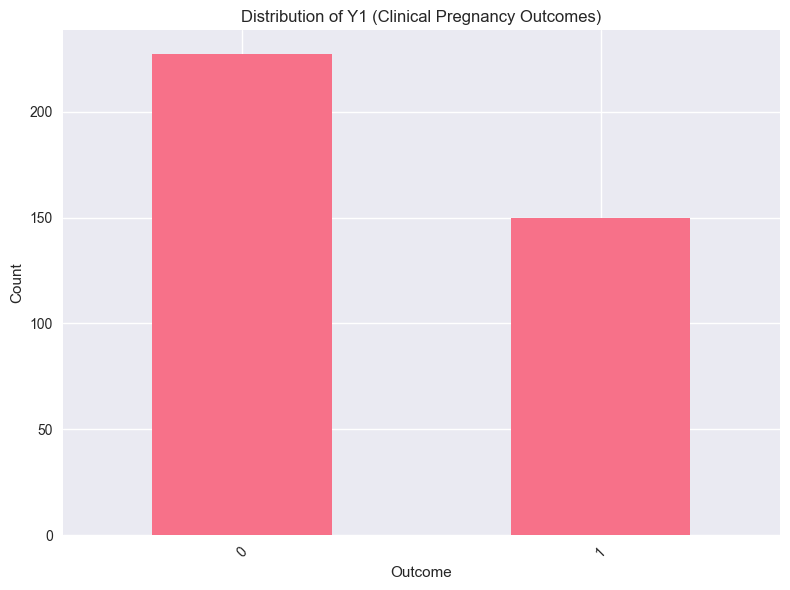

In [11]:
# Analyze Y1 (Clinical pregnancy outcome)
if 'Y1' in df.columns:
    y1_outcome = df['Y1']
    print("Y1 (Clinical pregnancy outcome) distribution:")
    print(y1_outcome.value_counts())
    
    # Plot outcome distribution
    plt.figure(figsize=(8, 6))
    y1_outcome.value_counts().plot(kind='bar')
    plt.title('Distribution of Y1 (Clinical Pregnancy Outcomes)')
    plt.xlabel('Outcome')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Y2 (Live birth outcome) distribution:
Y2
0    259
1    118
Name: count, dtype: int64


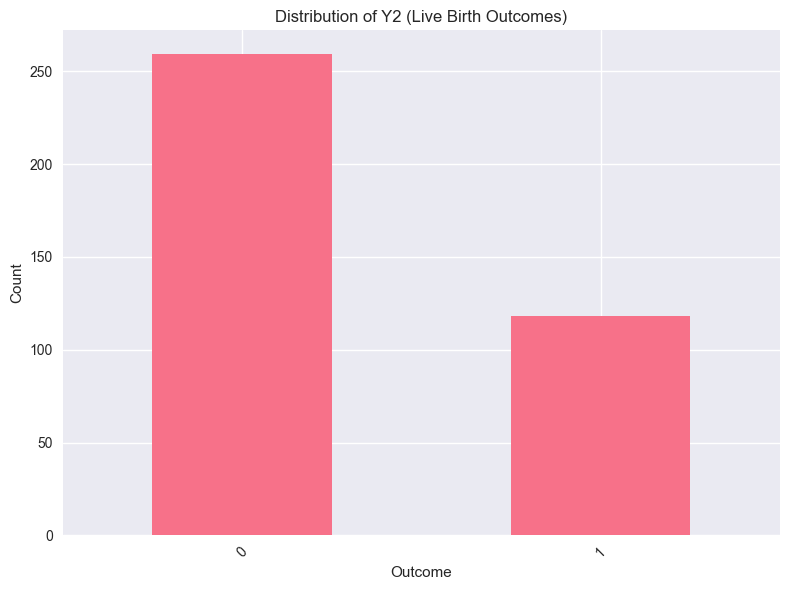

In [12]:
# Analyze Y2 (Live birth outcome)
if 'Y2' in df.columns:
    y2_outcome = df['Y2']
    print("\nY2 (Live birth outcome) distribution:")
    print(y2_outcome.value_counts())
    
    # Plot outcome distribution
    plt.figure(figsize=(8, 6))
    y2_outcome.value_counts().plot(kind='bar')
    plt.title('Distribution of Y2 (Live Birth Outcomes)')
    plt.xlabel('Outcome')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Sample Quality Assessment

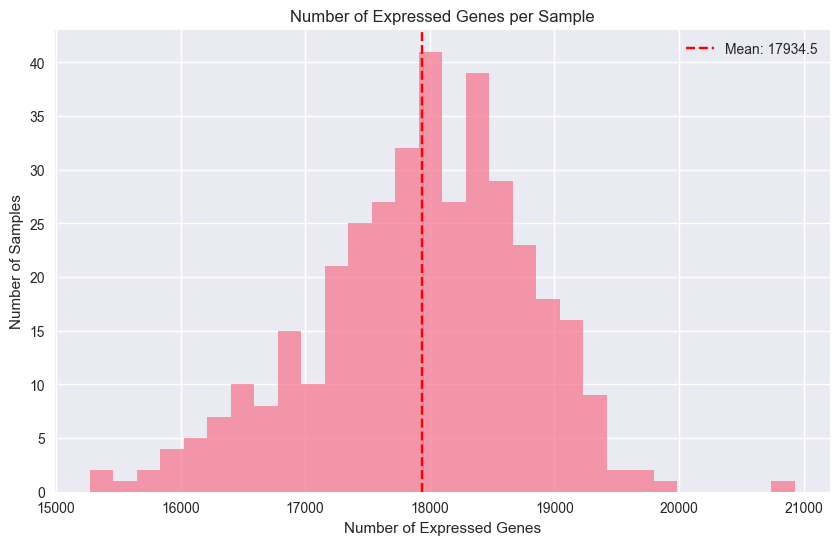

Average number of expressed genes per sample: 17934.5
Range: 15274 - 20926


In [14]:
# Check for potential outliers or quality issues
# Calculate the number of expressed genes per sample (non-zero values)
expressed_genes_per_sample = (gene_data > 0).sum(axis=1)

plt.figure(figsize=(10, 6))
plt.hist(expressed_genes_per_sample, bins=30, alpha=0.7)
plt.title('Number of Expressed Genes per Sample')
plt.xlabel('Number of Expressed Genes')
plt.ylabel('Number of Samples')
plt.axvline(expressed_genes_per_sample.mean(), color='red', linestyle='--', 
           label=f'Mean: {expressed_genes_per_sample.mean():.1f}')
plt.legend()
plt.show()

print(f"Average number of expressed genes per sample: {expressed_genes_per_sample.mean():.1f}")
print(f"Range: {expressed_genes_per_sample.min()} - {expressed_genes_per_sample.max()}")

## Summary and Next Steps

In [15]:
print("=== DATASET SUMMARY ===")
print(f"Total samples: {df.shape[0]}")
print(f"Total features: {df.shape[1]}")
print(f"Clinical variables: {len(available_clinical_cols)}")
print(f"Gene expression features: {len(gene_cols)}")
print(f"Data type: Log2 transformed gene expression data")
print("\n=== POTENTIAL ANALYSES ===")
print("1. Differential gene expression analysis between outcomes")
print("2. Principal component analysis (PCA) for dimensionality reduction")
print("3. Machine learning models for outcome prediction")
print("4. Gene pathway and functional enrichment analysis")
print("5. Biomarker discovery and validation")

=== DATASET SUMMARY ===
Total samples: 377
Total features: 40592
Clinical variables: 6
Gene expression features: 40586
Data type: Log2 transformed gene expression data

=== POTENTIAL ANALYSES ===
1. Differential gene expression analysis between outcomes
2. Principal component analysis (PCA) for dimensionality reduction
3. Machine learning models for outcome prediction
4. Gene pathway and functional enrichment analysis
5. Biomarker discovery and validation
